In [1]:
#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
#!pip install adjustText
!pip install matplotlib_venn

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sn

#from adjustText import adjust_text # Evite les labels superposés

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib.lines import Line2D
import os


In [4]:
#path = "/content/drive/MyDrive/Projet M2/"
path = "./"

In [5]:
#nbi.publish('victor/nbinteract-image/master', '/content/drive/MyDrive/Projet M2/Script.ipynb')

# Transcripto

In [6]:
def volcano_plot(file, pval, l2FC_up, l2FC_down, label_up, label_down):
    
    data = pd.read_csv(path + f"Transcriptomic/{file}", sep='\t')
    data["-log10"] = -(np.log10(data["padj"]))
    data = pd.DataFrame.dropna(data)
    data["diffexpressed"] = "NO"
    # if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
    data["diffexpressed"][(data["log2FoldChange"] > l2FC_up) & (data["padj"] < pval)] = "UP"
    # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] < l2FC_down) & (data["padj"] < pval)] = "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] > -1) & (data["log2FoldChange"] < 1)] = "NONE"
    data["label"] = np.nan
    data["label"][data["diffexpressed"] != "NO"] = data["symbol"][data["diffexpressed"] != "NO"]
    mycolors = []
    labels={'UP': 'red','DOWN':'blue','NO':'grey'}
    for i in data['diffexpressed']:
        if i == 'NONE':
            mycolors.append('white')
        elif i == 'UP':
            mycolors.append('red')
        elif i == 'DOWN':
            mycolors.append('blue')
        elif i == "NO":
            mycolors.append('grey')
    
    fig, ax = plt.subplots(figsize=(15,10))

    x = data['log2FoldChange']
    y = data['-log10']
    n = data["symbol"]
    texte = []

    ax.scatter(x, y, c=mycolors)

    for i, txt in enumerate(n):
        if (x.iloc[i] > label_up and y.iloc[i] > label_up) or (x.iloc[i] < label_down and y.iloc[i] > label_up):
            texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

    ax.set_xlabel("log2FoldChange",fontsize=22)
    ax.set_ylabel("-log10",fontsize=22)
    legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
    ax.legend(handles=legend_elements, title="Expression", loc="upper left")
    #adjust_text(texte)
    return plt.show() 


In [7]:
element = os.listdir(path + "Transcriptomic/")
file = []
for elm in element:
    if elm.endswith(".txt"):
        file.append(elm)
interact(volcano_plot,file=file, pval =(-0.5,0.5,0.05), l2FC_up=(1,10,0.5), l2FC_down=(-10,-1,0.5), 
         label_up=(5,10,1), label_down=(-10,-1,1))

interactive(children=(Dropdown(description='file', options=('all_de_j2_vs_j0_allgenes.txt', 'all_de_j4_vs_j0_a…

<function __main__.volcano_plot(file, pval, l2FC_up, l2FC_down, label_up, label_down)>

# Proteo

In [8]:
def volcano_plot_prot(file,  pval, l2FC_up, l2FC_down):
    
    data = pd.read_csv(path + f"Proteomique/{file}", sep='\t', skiprows=1)
    data["-log10"] = -(np.log10(data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"]))
    #data = pd.DataFrame.dropna(data)
    data["diffexpressed"] = "NO"
    # if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
    data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > l2FC_up) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < pval)] = "UP"
    # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
    data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] < l2FC_down) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < pval)] = "DOWN"
    data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > -1) & (data["Abundance Ratio (log2): (T48h) / (T0)"] < 1)] = "NONE"
    data["label"] = np.nan
    data["label"][data["diffexpressed"] != "NO"] = data["Gene Symbol"][data["diffexpressed"] != "NO"]
    mycolors = []

    for i in data['diffexpressed']:
        if i == 'NONE':
            mycolors.append('grey')
        elif i == 'UP':
            mycolors.append('red')
        elif i == 'DOWN':
            mycolors.append('blue')
        elif i == "NO":
            mycolors.append('grey')

    fig, ax = plt.subplots(figsize=(15,10))

    x = data['Abundance Ratio (log2): (T48h) / (T0)']
    y = data['-log10']
    n = data["Gene Symbol"]
    texte = []

    ax.scatter(x, y, c=mycolors)

    for i, txt in enumerate(n):
        if (x.iloc[i] > 2 and y.iloc[i] > 2) or (x.iloc[i] < -2 and y.iloc[i] > 2):
            texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

    ax.set_xlabel("log2FoldChange",fontsize=22)
    ax.set_ylabel("-log10",fontsize=22)
    legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
    ax.legend(handles=legend_elements, title="Expression", loc="upper left")
    #adjust_text(texte)
    return plt.show()

In [9]:
element = os.listdir(path + "Proteomique/")

file = []
for elm in element:
  print(elm)
  if elm.endswith(".txt"):
    file.append(elm)
interact(volcano_plot_prot,file=file, pval =(-0.5,0.5,0.05), l2FC_up=(1,10,0.5), l2FC_down=(-10,-1,0.5))

Experience1.txt
Experience2.txt
Experience_1
Experience_2


interactive(children=(Dropdown(description='file', options=('Experience1.txt', 'Experience2.txt'), value='Expe…

<function __main__.volcano_plot_prot(file, pval, l2FC_up, l2FC_down)>

In [10]:
prot_data = pd.read_csv(path+"Proteomique/Experience1.txt", sep='\t', skiprows=1)
prot_data.iloc[:,[2,3,21,30,31,32,36,37,38]].sort_values(by=['Abundance Ratio (log2): (T48h) / (T0)'])
print("Column headers from list(df.columns):",
      list(prot_data.columns), "\n")
prot_data.iloc[:,[2,3,6,7,21,30,31,32,36,37,38]].sort_values(by=['Coverage [%]'], ascending=False)


Column headers from list(df.columns): ['Protein FDR Confidence: Combined', 'Master', 'Accession', 'Description', 'Contaminant', 'Sum PEP Score', 'Coverage [%]', '# Peptides', '# PSMs', '# Unique Peptides', '# AAs', 'MW [kDa]', 'calc. pI', 'Score Sequest HT: Sequest HT', '# Peptides (by Search Engine): Sequest HT', 'Biological Process', 'Cellular Component', 'Molecular Function', 'Pfam IDs', 'Entrez Gene ID', 'Ensembl Gene ID', 'Gene Symbol', 'Chromosome', 'KEGG Pathways', 'Reactome Pathways', 'WikiPathways', '# Protein Pathway Groups', 'Abundance Ratio: (T48h) / (T0)', 'Abundance Ratio: (T96h) / (T0)', 'Abundance Ratio: (T96h) / (T48h)', 'Abundance Ratio (log2): (T48h) / (T0)', 'Abundance Ratio (log2): (T96h) / (T0)', 'Abundance Ratio (log2): (T96h) / (T48h)', 'Abundance Ratio P-Value: (T48h) / (T0)', 'Abundance Ratio P-Value: (T96h) / (T0)', 'Abundance Ratio P-Value: (T96h) / (T48h)', 'Abundance Ratio Adj. P-Value: (T48h) / (T0)', 'Abundance Ratio Adj. P-Value: (T96h) / (T0)', 'Abunda

,Accession,Description,Coverage [%],# Peptides,Gene Symbol,Abundance Ratio (log2): (T48h) / (T0),Abundance Ratio (log2): (T96h) / (T0),Abundance Ratio (log2): (T96h) / (T48h),Abundance Ratio Adj. P-Value: (T48h) / (T0),Abundance Ratio Adj. P-Value: (T96h) / (T0),Abundance Ratio Adj. P-Value: (T96h) / (T48h)
468,Q9H299,SH3 domain-binding glutamic acid-rich-like pro...,84,8,SH3BGRL3,0.36,-0.21,-0.50,6.527472e-01,0.990871,0.941015
15,P08670,Vimentin OS=Homo sapiens OX=9606 GN=VIM PE=1 SV=4,83,41,VIM,0.59,0.40,-0.13,1.825485e-01,0.910200,0.999131
405,P0DOY2,Immunoglobulin lambda constant 2 OS=Homo sapie...,81,6,IGLC2,-1.32,-1.04,-0.06,1.718990e-07,0.377475,0.991557
263,P22392,Nucleoside diphosphate kinase B OS=Homo sapien...,81,11,NME2; NME1-NME2,0.09,-0.29,-0.31,9.983878e-01,0.990871,0.991557
190,P01834,Immunoglobulin kappa constant OS=Homo sapiens ...,80,6,IGKC,-1.32,-1.31,0.02,2.050440e-07,0.172415,0.991557
...,...,...,...,...,...,...,...,...,...,...,...
1653,Q15746,"Myosin light chain kinase, smooth muscle OS=Ho...",0,1,MYLK,0.11,-0.49,-0.60,9.983878e-01,0.938185,0.818669
1617,Q96M86,Dynein heavy chain domain-containing protein 1...,0,1,DNHD1,-0.11,1.55,1.65,9.041618e-01,0.033878,0.000307
1618,Q07954,Prolow-density lipoprotein receptor-related pr...,0,1,LRP1,NaN,NaN,NaN,NaN,NaN,NaN
1412,Q5T4S7,E3 ubiquitin-protein ligase UBR4 OS=Homo sapie...,0,2,UBR4,-0.13,-0.27,0.19,8.673399e-01,0.990871,0.945768


In [11]:
data = prot_data

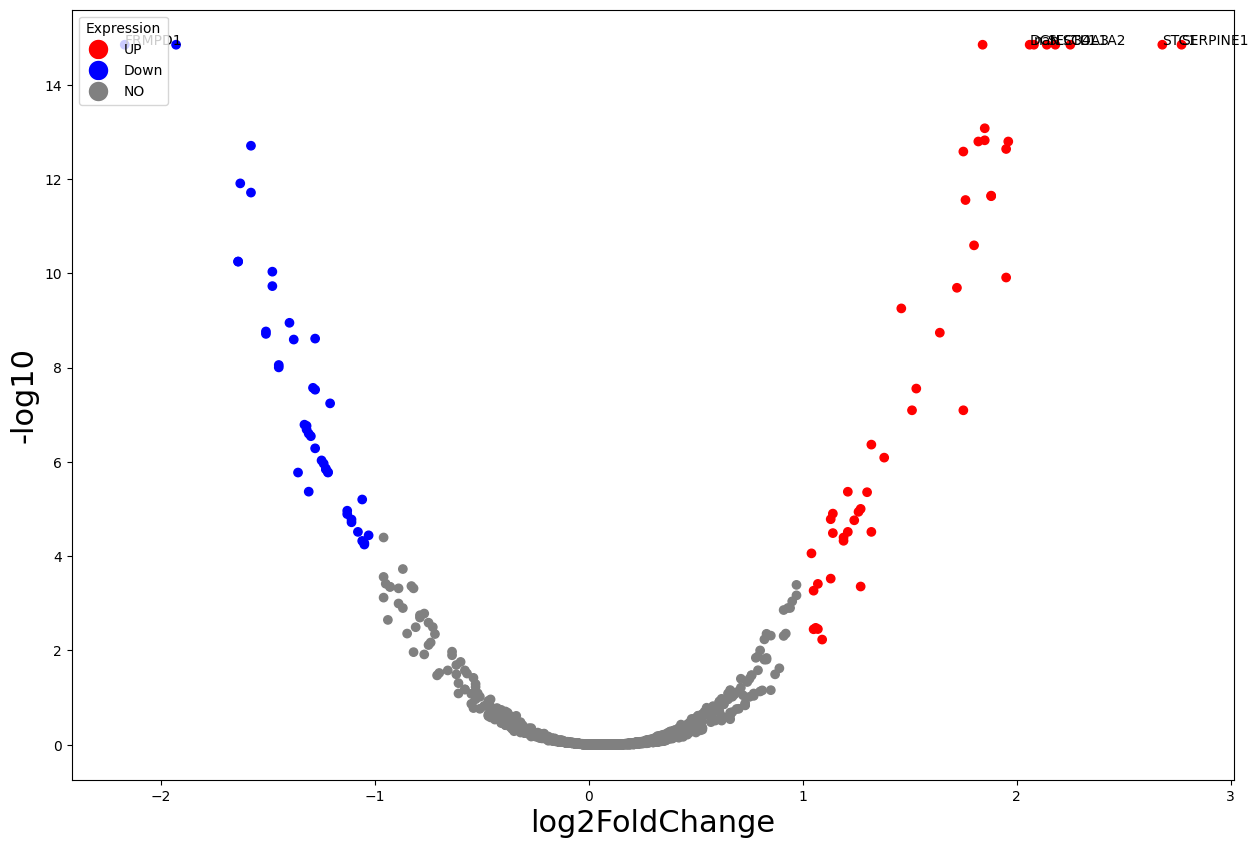

In [12]:
data["-log10"] = -(np.log10(data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"]))
#data = pd.DataFrame.dropna(data)
data["diffexpressed"] = "NO"
# if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > 1) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05)] = "UP"
# if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] < -1) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05)] = "DOWN"
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > -1) & (data["Abundance Ratio (log2): (T48h) / (T0)"] < 1)] = "NONE"
data["label"] = np.nan
data["label"][data["diffexpressed"] != "NO"] = data["Gene Symbol"][data["diffexpressed"] != "NO"]
mycolors = []

for i in data['diffexpressed']:
    if i == 'NONE':
        mycolors.append('grey')
    elif i == 'UP':
        mycolors.append('red')
    elif i == 'DOWN':
        mycolors.append('blue')
    elif i == "NO":
        mycolors.append('grey')

fig, ax = plt.subplots(figsize=(15,10))

x = data['Abundance Ratio (log2): (T48h) / (T0)']
y = data['-log10']
n = data["Gene Symbol"]
texte = []

ax.scatter(x, y, c=mycolors)

for i, txt in enumerate(n):
    if (x.iloc[i] > 2 and y.iloc[i] > 2) or (x.iloc[i] < -2 and y.iloc[i] > 2):
        texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

ax.set_xlabel("log2FoldChange",fontsize=22)
ax.set_ylabel("-log10",fontsize=22)
legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
               Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
               Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
ax.legend(handles=legend_elements, title="Expression", loc="upper left")
#adjust_text(texte)
plt.show()

In [13]:
#pour ne choisir que les up ou down
prot_data = prot_data[(prot_data["Abundance Ratio (log2): (T96h) / (T48h)"] > 0)]

In [14]:
de_1_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05]["Gene Symbol"].dropna())
de_2_1 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T48h)"] < 0.05]["Gene Symbol"].dropna())
de_2_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T0)"] < 0.05]["Gene Symbol"].dropna())

In [15]:
de_1_0

{'A2M',
 'ANXA1',
 'APP',
 'AVEN',
 'C19orf10; MYDGF',
 'C1QB',
 'C1R',
 'C1S',
 'C4BPA',
 'C5',
 'CD109',
 'CD9',
 'CFH',
 'COL12A1',
 'COL4A2',
 'COL6A3',
 'COL7A1',
 'CST3',
 'DNAJB11',
 'EFEMP1',
 'F13A1',
 'F2',
 'FBN2',
 'HIST1H1B',
 'HIST1H1C',
 'HMGCS1',
 'HNRNPL',
 'HRG',
 'HSPG2',
 'HTRA1',
 'IFNE',
 'IGHG1',
 'IGHV1OR15-1',
 'IGHV3-7',
 'IGJ; JCHAIN',
 'IGKC',
 'IGLL5',
 'LGALS3BP',
 'MYH11',
 'NLN',
 'PCOLCE',
 'PLOD1',
 'PMPCB',
 'PRSS1',
 'PTX3',
 'QDPR',
 'RANGAP1',
 'SERPINA3',
 'SERPINF1',
 'SF1',
 'SLC34A3',
 'TBC1D13',
 'TGFBI',
 'TIMP2',
 'TNC',
 'TTLL12',
 'VWF'}

In [40]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2

In [17]:
inter4 = de_1_0.intersection(de_2_1.intersection(de_2_0))

diff1 = de_1_0 - de_2_1 - de_2_0
diff2 = de_2_1 - de_1_0 - de_2_0
diff3 = de_2_0 - de_2_1 - de_1_0

inter1 = de_1_0.intersection(de_2_1)
inter2 = de_2_1.intersection(de_2_0)
inter3 = de_2_0.intersection(de_1_0)


/home/zaki4/.local/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


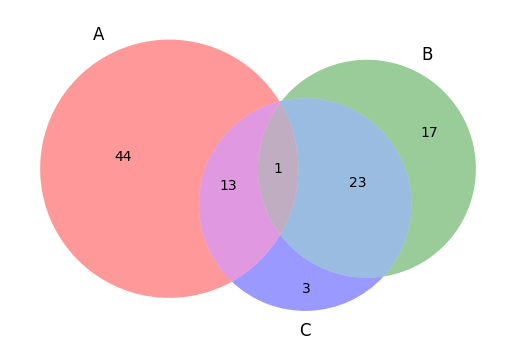

In [18]:
venn3(subsets = (len(diff1), len(diff2), len(inter1), len(diff3), len(inter3), len(inter2), len(inter4)))
plt.show()

Text(0.5, 1.0, 'Venn Diagram')

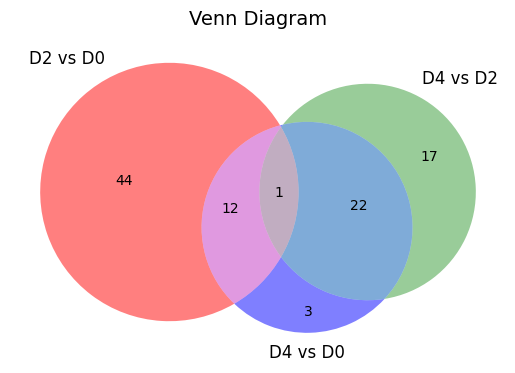

In [19]:
vd = venn3([de_1_0, de_2_1 , de_2_0],set_labels=("D2 vs D0","D4 vs D2","D4 vs D0"))
vd.get_patch_by_id("100").set_alpha(0.5)
vd.get_patch_by_id("001").set_alpha(0.5)
vd.get_patch_by_id("011").set_alpha(0.5)

plt.title("Venn Diagram",fontsize=14)

Text(0.5, 1.0, 'Venn Diagram')

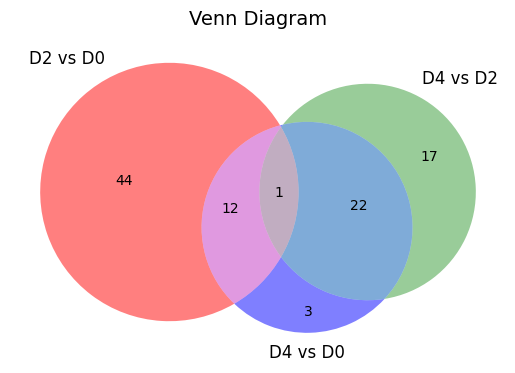

In [20]:
vd = venn3([de_1_0, de_2_1 , de_2_0],set_labels=("D2 vs D0","D4 vs D2","D4 vs D0"))
vd.get_patch_by_id("100").set_alpha(0.5)
vd.get_patch_by_id("001").set_alpha(0.5)
vd.get_patch_by_id("011").set_alpha(0.5)

plt.title("Venn Diagram",fontsize=14)

Text(0.5, 1.0, 'Venn Diagram')

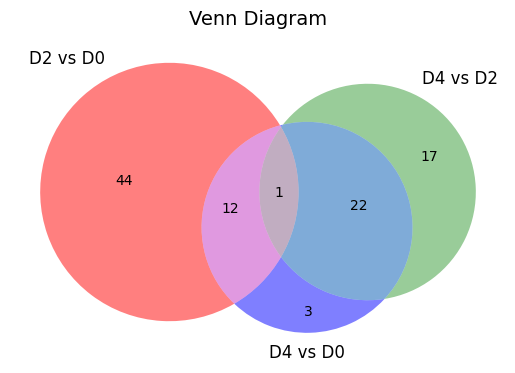

In [21]:
vd = venn3([de_1_0, de_2_1 , de_2_0],set_labels=("D2 vs D0","D4 vs D2","D4 vs D0"))
vd.get_patch_by_id("100").set_alpha(0.5)
vd.get_patch_by_id("001").set_alpha(0.5)
vd.get_patch_by_id("011").set_alpha(0.5)

plt.title("Venn Diagram",fontsize=14)

In [22]:
prot_data = pd.read_csv(path+"Proteomique/Experience1.txt", sep='\t', skiprows=1)


In [23]:
de_1_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05]["Gene Symbol"].dropna())
de_2_1 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T48h)"] < 0.05]["Gene Symbol"].dropna())
de_2_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T0)"] < 0.05]["Gene Symbol"].dropna())

In [24]:
de_allprot = de_1_0.union(de_2_1.union(de_2_0))

In [25]:
len(de_allprot)

190

In [26]:
element = os.listdir(path + "Transcriptomic/")
file = []
for elm in element:
    if elm.endswith(".txt"):
        file.append(elm)
        

transcripto_df = pd.DataFrame(pd.read_csv(path+ "Transcriptomic/"+file[0], sep='\t'))
for i in range(1,(len(file))):
    data = pd.read_csv(path +"Transcriptomic/"+ file[i], sep='\t')
    df = pd.DataFrame(data)
    transcripto_df = pd.concat([transcripto_df, df],axis=1)
    
pval = 0.05
l2FC_up= 1
l2FC_down= -1
transcripto_df

,symbol,baseMean,log2FoldChange,lfcSE,pvalue,padj,symbol,baseMean,log2FoldChange,lfcSE,pvalue,padj,symbol,baseMean,log2FoldChange,lfcSE,pvalue,padj
0,5_8S_rRNA,0.000000,NaN,NaN,NaN,NaN,5_8S_rRNA,0.000000,NaN,NaN,NaN,NaN,5_8S_rRNA,0.000000,NaN,NaN,NaN,NaN
1,5S_rRNA,0.038653,-0.001017,0.274193,0.982570,NaN,5S_rRNA,0.038653,0.026467,0.462591,0.953674,NaN,5S_rRNA,0.038653,0.011815,0.311794,9.710891e-01,NaN
2,7SK,0.517037,-0.019322,0.273432,0.674042,NaN,7SK,0.517037,0.032463,0.453379,0.746268,NaN,7SK,0.517037,0.037898,0.312598,4.502169e-01,NaN
3,A1BG,595.000641,-0.027497,0.221786,0.831401,0.927916,A1BG,595.000641,-0.628372,0.370329,0.023891,0.084093,A1BG,595.000641,-0.444094,0.375012,4.079018e-02,0.166219
4,A1BG-AS1,391.792709,-0.199175,0.182067,0.159720,0.415848,A1BG-AS1,391.792709,-0.235275,0.191147,0.173349,0.342825,A1BG-AS1,391.792709,0.007164,0.170554,9.614585e-01,0.985126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59076,ZYG11B,1561.380636,-0.054102,0.138973,0.644442,0.836762,ZYG11B,1561.380636,0.160130,0.151988,0.264616,0.454239,ZYG11B,1561.380636,0.207555,0.149667,1.147623e-01,0.318366
59077,ZYX,18306.620380,0.087327,0.126695,0.438049,0.704376,ZYX,18306.620380,-0.630777,0.140044,0.000003,0.000071,ZYX,18306.620380,-0.727283,0.142036,4.490280e-08,0.000007
59078,ZYXP1,0.000000,NaN,NaN,NaN,NaN,ZYXP1,0.000000,NaN,NaN,NaN,NaN,ZYXP1,0.000000,NaN,NaN,NaN,NaN
59079,ZZEF1,2059.853797,0.057165,0.184602,0.681430,0.856633,ZZEF1,2059.853797,0.385678,0.231907,0.054982,0.154204,ZZEF1,2059.853797,0.250485,0.218927,1.315116e-01,0.347156


In [28]:
def treat_transcripto_data(filepath, pval = 0.05, l2FC_up = 1, l2FC_down= -1):
    data = pd.read_csv(filepath, sep='\t')
    data["-log10"] = -(np.log10(data["padj"]))
    data = pd.DataFrame.dropna(data)
    data["diffexpressed"] = "NO"
    # if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
    data["diffexpressed"][(data["log2FoldChange"] > l2FC_up) & (data["padj"] < pval)] = "UP"
    # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] < l2FC_down) & (data["padj"] < pval)] = "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] > -1) & (data["log2FoldChange"] < 1)] = "NONE"
    data["label"] = np.nan
    data["label"][data["diffexpressed"] != "NO"] = data["symbol"][data["diffexpressed"] != "NO"]
    return data

In [29]:
dfs = []

for f in file:
    day = f.strip('all_de_').strip('_allgenes.txt')
    dframe = treat_transcripto_data(path + "Transcriptomic/"+ f)
    ncol = []
    for col in dframe.columns:
        ncol.append(col + '_' +day)
    dframe.columns = ncol
    dfs.append(dframe)

diff_tr = pd.concat([dfs[0], dfs[1]],axis=1)
diff_tr = pd.concat([diff_tr, dfs[2]],axis=1)

diff_tr = diff_tr.dropna()
diff_tr

,symbol_j2_vs_j0,baseMean_j2_vs_j0,log2FoldChange_j2_vs_j0,lfcSE_j2_vs_j0,pvalue_j2_vs_j0,padj_j2_vs_j0,-log10_j2_vs_j0,diffexpressed_j2_vs_j0,label_j2_vs_j0,symbol_j4_vs_j0,...,label_j4_vs_j0,symbol_j4_vs_j2,baseMean_j4_vs_j2,log2FoldChange_j4_vs_j2,lfcSE_j4_vs_j2,pvalue_j4_vs_j2,padj_j4_vs_j2,-log10_j4_vs_j2,diffexpressed_j4_vs_j2,label_j4_vs_j2
3,A1BG,595.000641,-0.027497,0.221786,8.314010e-01,9.279159e-01,0.032491,NONE,A1BG,A1BG,...,A1BG,A1BG,595.000641,-0.444094,0.375012,4.079018e-02,0.166219,0.779319,NONE,A1BG
4,A1BG-AS1,391.792709,-0.199175,0.182067,1.597196e-01,4.158482e-01,0.381065,NONE,A1BG-AS1,A1BG-AS1,...,A1BG-AS1,A1BG-AS1,391.792709,0.007164,0.170554,9.614585e-01,0.985126,0.006508,NONE,A1BG-AS1
6,A2M,281.240669,6.917340,0.919416,6.193900e-17,1.018790e-13,12.991915,UP,A2M,A2M,...,A2M,A2M,281.240669,-0.113573,0.316604,3.042610e-01,0.563005,0.249488,NONE,A2M
7,A2M-AS1,7.184134,-0.163297,0.312138,1.476119e-01,3.982945e-01,0.399796,NONE,A2M-AS1,A2M-AS1,...,A2M-AS1,A2M-AS1,7.184134,0.174178,0.335308,2.023796e-01,0.449579,0.347194,NONE,A2M-AS1
16,AAAS,1355.570585,0.046459,0.162502,6.286567e-01,8.285540e-01,0.081679,NONE,AAAS,AAAS,...,AAAS,AAAS,1355.570585,-0.393836,0.197307,1.517288e-02,0.086682,1.062071,NONE,AAAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59074,ZYG11A,16.320157,0.021718,0.230850,8.646892e-01,9.432094e-01,0.025392,NONE,ZYG11A,ZYG11A,...,ZYG11A,ZYG11A,16.320157,-0.802157,0.507067,7.714634e-03,0.054675,1.262212,NONE,ZYG11A
59076,ZYG11B,1561.380636,-0.054102,0.138973,6.444423e-01,8.367624e-01,0.077398,NONE,ZYG11B,ZYG11B,...,ZYG11B,ZYG11B,1561.380636,0.207555,0.149667,1.147623e-01,0.318366,0.497073,NONE,ZYG11B
59077,ZYX,18306.620380,0.087327,0.126695,4.380494e-01,7.043764e-01,0.152195,NONE,ZYX,ZYX,...,ZYX,ZYX,18306.620380,-0.727283,0.142036,4.490280e-08,0.000007,5.136552,NONE,ZYX
59079,ZZEF1,2059.853797,0.057165,0.184602,6.814300e-01,8.566325e-01,0.067205,NONE,ZZEF1,ZZEF1,...,ZZEF1,ZZEF1,2059.853797,0.250485,0.218927,1.315116e-01,0.347156,0.459475,NONE,ZZEF1


In [30]:

diff_tr = diff_tr.loc[((diff_tr["diffexpressed_j2_vs_j0"] != "NONE") | (diff_tr["diffexpressed_j4_vs_j0"] != "NONE")| (diff_tr["diffexpressed_j4_vs_j2"] != "NONE"))] 
diff_tr

,symbol_j2_vs_j0,baseMean_j2_vs_j0,log2FoldChange_j2_vs_j0,lfcSE_j2_vs_j0,pvalue_j2_vs_j0,padj_j2_vs_j0,-log10_j2_vs_j0,diffexpressed_j2_vs_j0,label_j2_vs_j0,symbol_j4_vs_j0,...,label_j4_vs_j0,symbol_j4_vs_j2,baseMean_j4_vs_j2,log2FoldChange_j4_vs_j2,lfcSE_j4_vs_j2,pvalue_j4_vs_j2,padj_j4_vs_j2,-log10_j4_vs_j2,diffexpressed_j4_vs_j2,label_j4_vs_j2
6,A2M,281.240669,6.917340,0.919416,6.193900e-17,1.018790e-13,12.991915,UP,A2M,A2M,...,A2M,A2M,281.240669,-0.113573,0.316604,3.042610e-01,0.563005,0.249488,NONE,A2M
51,ABCA1,580.774406,0.334030,0.522124,3.292867e-02,1.628529e-01,0.788204,NONE,ABCA1,ABCA1,...,ABCA1,ABCA1,580.774406,0.285056,0.421662,8.348025e-02,0.261497,0.582532,NONE,ABCA1
54,ABCA12,3.667582,0.009048,0.264503,8.956134e-01,9.566846e-01,0.019231,NONE,ABCA12,ABCA12,...,ABCA12,ABCA12,3.667582,0.377923,0.684368,1.610172e-02,0.090027,1.045627,NONE,ABCA12
55,ABCA13,304.219557,5.128473,0.963228,3.612990e-09,9.142710e-07,6.038925,UP,ABCA13,ABCA13,...,ABCA13,ABCA13,304.219557,-0.110826,0.322812,2.434925e-01,0.499314,0.301626,NONE,ABCA13
61,ABCA6,146.845932,1.786330,0.820859,9.241090e-04,1.517476e-02,1.818878,UP,ABCA6,ABCA6,...,ABCA6,ABCA6,146.845932,3.407674,0.686597,3.284460e-08,0.000006,5.244557,UP,ABCA6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59012,ZP1,95.822803,3.018958,0.767636,3.235510e-06,2.072900e-04,3.683422,UP,ZP1,ZP1,...,ZP1,ZP1,95.822803,-1.715843,0.866181,1.388181e-03,0.016235,1.789557,DOWN,ZP1
59026,ZRANB2-AS2,14.638277,-1.777593,0.601322,8.405020e-05,2.618916e-03,2.581878,DOWN,ZRANB2-AS2,ZRANB2-AS2,...,ZRANB2-AS2,ZRANB2-AS2,14.638277,0.336861,0.446804,6.296810e-02,0.219027,0.659502,NONE,ZRANB2-AS2
59057,ZSWIM4,297.532310,0.366880,0.315539,4.904733e-02,2.087287e-01,0.680418,NONE,ZSWIM4,ZSWIM4,...,ZSWIM4,ZSWIM4,297.532310,0.713057,0.341816,3.951721e-03,0.034527,1.461842,NONE,ZSWIM4
59058,ZSWIM5,33.168150,3.357657,0.590018,5.975490e-10,2.144440e-07,6.668686,UP,ZSWIM5,ZSWIM5,...,ZSWIM5,ZSWIM5,33.168150,-1.876435,0.583887,5.626500e-05,0.001561,2.806519,DOWN,ZSWIM5


In [31]:
symbol = diff_tr.pop("symbol_j2_vs_j0")

diff_tr.insert(0, "symbol", symbol)
diff_tr = diff_tr.drop("symbol_j4_vs_j0", axis=1)
diff_tr = diff_tr.drop("symbol_j4_vs_j2", axis=1)


diff_tr

,symbol,baseMean_j2_vs_j0,log2FoldChange_j2_vs_j0,lfcSE_j2_vs_j0,pvalue_j2_vs_j0,padj_j2_vs_j0,-log10_j2_vs_j0,diffexpressed_j2_vs_j0,label_j2_vs_j0,baseMean_j4_vs_j0,...,diffexpressed_j4_vs_j0,label_j4_vs_j0,baseMean_j4_vs_j2,log2FoldChange_j4_vs_j2,lfcSE_j4_vs_j2,pvalue_j4_vs_j2,padj_j4_vs_j2,-log10_j4_vs_j2,diffexpressed_j4_vs_j2,label_j4_vs_j2
6,A2M,281.240669,6.917340,0.919416,6.193900e-17,1.018790e-13,12.991915,UP,A2M,281.240669,...,UP,A2M,281.240669,-0.113573,0.316604,3.042610e-01,0.563005,0.249488,NONE,A2M
51,ABCA1,580.774406,0.334030,0.522124,3.292867e-02,1.628529e-01,0.788204,NONE,ABCA1,580.774406,...,UP,ABCA1,580.774406,0.285056,0.421662,8.348025e-02,0.261497,0.582532,NONE,ABCA1
54,ABCA12,3.667582,0.009048,0.264503,8.956134e-01,9.566846e-01,0.019231,NONE,ABCA12,3.667582,...,UP,ABCA12,3.667582,0.377923,0.684368,1.610172e-02,0.090027,1.045627,NONE,ABCA12
55,ABCA13,304.219557,5.128473,0.963228,3.612990e-09,9.142710e-07,6.038925,UP,ABCA13,304.219557,...,UP,ABCA13,304.219557,-0.110826,0.322812,2.434925e-01,0.499314,0.301626,NONE,ABCA13
61,ABCA6,146.845932,1.786330,0.820859,9.241090e-04,1.517476e-02,1.818878,UP,ABCA6,146.845932,...,UP,ABCA6,146.845932,3.407674,0.686597,3.284460e-08,0.000006,5.244557,UP,ABCA6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59012,ZP1,95.822803,3.018958,0.767636,3.235510e-06,2.072900e-04,3.683422,UP,ZP1,95.822803,...,NONE,ZP1,95.822803,-1.715843,0.866181,1.388181e-03,0.016235,1.789557,DOWN,ZP1
59026,ZRANB2-AS2,14.638277,-1.777593,0.601322,8.405020e-05,2.618916e-03,2.581878,DOWN,ZRANB2-AS2,14.638277,...,NONE,ZRANB2-AS2,14.638277,0.336861,0.446804,6.296810e-02,0.219027,0.659502,NONE,ZRANB2-AS2
59057,ZSWIM4,297.532310,0.366880,0.315539,4.904733e-02,2.087287e-01,0.680418,NONE,ZSWIM4,297.532310,...,UP,ZSWIM4,297.532310,0.713057,0.341816,3.951721e-03,0.034527,1.461842,NONE,ZSWIM4
59058,ZSWIM5,33.168150,3.357657,0.590018,5.975490e-10,2.144440e-07,6.668686,UP,ZSWIM5,33.168150,...,NONE,ZSWIM5,33.168150,-1.876435,0.583887,5.626500e-05,0.001561,2.806519,DOWN,ZSWIM5


In [32]:
baseMean = diff_tr.pop("baseMean_j2_vs_j0")

diff_tr.insert(1, "baseMean", baseMean)
diff_tr = diff_tr.drop("baseMean_j4_vs_j0", axis=1)
diff_tr = diff_tr.drop("baseMean_j4_vs_j2", axis=1)


diff_tr

,symbol,baseMean,log2FoldChange_j2_vs_j0,lfcSE_j2_vs_j0,pvalue_j2_vs_j0,padj_j2_vs_j0,-log10_j2_vs_j0,diffexpressed_j2_vs_j0,label_j2_vs_j0,log2FoldChange_j4_vs_j0,...,-log10_j4_vs_j0,diffexpressed_j4_vs_j0,label_j4_vs_j0,log2FoldChange_j4_vs_j2,lfcSE_j4_vs_j2,pvalue_j4_vs_j2,padj_j4_vs_j2,-log10_j4_vs_j2,diffexpressed_j4_vs_j2,label_j4_vs_j2
6,A2M,281.240669,6.917340,0.919416,6.193900e-17,1.018790e-13,12.991915,UP,A2M,6.080232,...,10.275584,UP,A2M,-0.113573,0.316604,3.042610e-01,0.563005,0.249488,NONE,A2M
51,ABCA1,580.774406,0.334030,0.522124,3.292867e-02,1.628529e-01,0.788204,NONE,ABCA1,1.980378,...,2.854417,UP,ABCA1,0.285056,0.421662,8.348025e-02,0.261497,0.582532,NONE,ABCA1
54,ABCA12,3.667582,0.009048,0.264503,8.956134e-01,9.566846e-01,0.019231,NONE,ABCA12,1.324389,...,1.342192,UP,ABCA12,0.377923,0.684368,1.610172e-02,0.090027,1.045627,NONE,ABCA12
55,ABCA13,304.219557,5.128473,0.963228,3.612990e-09,9.142710e-07,6.038925,UP,ABCA13,3.972052,...,4.226584,UP,ABCA13,-0.110826,0.322812,2.434925e-01,0.499314,0.301626,NONE,ABCA13
61,ABCA6,146.845932,1.786330,0.820859,9.241090e-04,1.517476e-02,1.818878,UP,ABCA6,5.802107,...,14.345824,UP,ABCA6,3.407674,0.686597,3.284460e-08,0.000006,5.244557,UP,ABCA6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59012,ZP1,95.822803,3.018958,0.767636,3.235510e-06,2.072900e-04,3.683422,UP,ZP1,0.374059,...,0.530663,NONE,ZP1,-1.715843,0.866181,1.388181e-03,0.016235,1.789557,DOWN,ZP1
59026,ZRANB2-AS2,14.638277,-1.777593,0.601322,8.405020e-05,2.618916e-03,2.581878,DOWN,ZRANB2-AS2,-0.708965,...,1.027582,NONE,ZRANB2-AS2,0.336861,0.446804,6.296810e-02,0.219027,0.659502,NONE,ZRANB2-AS2
59057,ZSWIM4,297.532310,0.366880,0.315539,4.904733e-02,2.087287e-01,0.680418,NONE,ZSWIM4,1.431551,...,4.415478,UP,ZSWIM4,0.713057,0.341816,3.951721e-03,0.034527,1.461842,NONE,ZSWIM4
59058,ZSWIM5,33.168150,3.357657,0.590018,5.975490e-10,2.144440e-07,6.668686,UP,ZSWIM5,0.876525,...,1.154601,NONE,ZSWIM5,-1.876435,0.583887,5.626500e-05,0.001561,2.806519,DOWN,ZSWIM5


In [33]:
de_tr = set(diff_tr["symbol"])

In [34]:
inter = (de_tr.intersection(de_allprot))

In [38]:
print(type(de_allprot))

<class 'set'>


Text(0.5, 1.0, 'Venn Diagram')

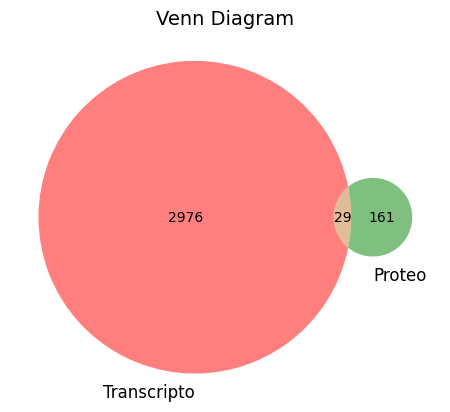

In [42]:
vd = venn2([de_tr, de_allprot],set_labels=("Transcripto","Proteo"))
vd.get_patch_by_id("10").set_alpha(0.5)
vd.get_patch_by_id("01").set_alpha(0.5)

plt.title("Venn Diagram for all genes",fontsize=14)

In [56]:
de_tr_1 = set(diff_tr[(diff_tr["diffexpressed_j2_vs_j0"] != "NONE")])
de_tr_2 = set(diff_tr[(diff_tr["diffexpressed_j4_vs_j0"] != "NONE")])
de_tr_3 = set(diff_tr[(diff_tr["diffexpressed_j4_vs_j2"] != "NONE")])

In [62]:
(diff_tr["diffexpressed_j2_vs_j0"] != "UP").value_counts()

True     2249
False     756
Name: diffexpressed_j2_vs_j0, dtype: int64

In [66]:
up_tr_1 = set(diff_tr[(diff_tr["diffexpressed_j2_vs_j0"] == "UP")]["symbol"])
up_tr_2 = set(diff_tr[(diff_tr["diffexpressed_j4_vs_j0"] == "UP")]["symbol"])
up_tr_3 = set(diff_tr[(diff_tr["diffexpressed_j4_vs_j2"] == "UP")]["symbol"])

Text(0.5, 1.0, 'Overexpressed transcripts on different days')

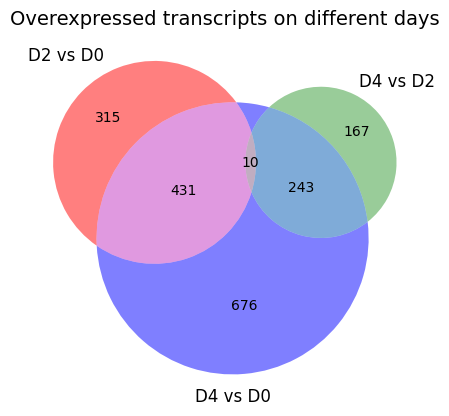

In [68]:
vd = venn3([up_tr_1, up_tr_3 , up_tr_2],set_labels=("D2 vs D0","D4 vs D2","D4 vs D0"))
vd.get_patch_by_id("100").set_alpha(0.5)
vd.get_patch_by_id("001").set_alpha(0.5)
vd.get_patch_by_id("011").set_alpha(0.5)

plt.title("Overexpressed transcripts on different days",fontsize=14)

Text(0.5, 1.0, 'Venn Diagram D2 vs D0')

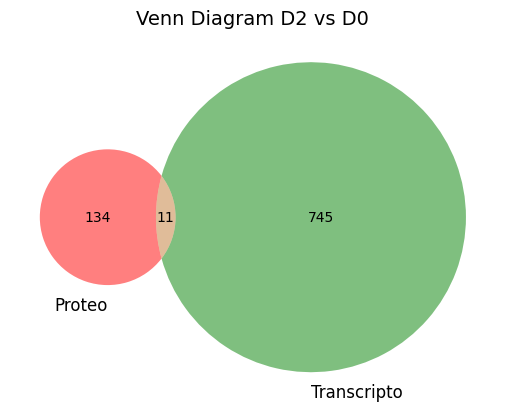

In [69]:
vd = venn2([de_1_0, up_tr_1],set_labels=("Proteo","Transcripto"))
vd.get_patch_by_id("10").set_alpha(0.5)
vd.get_patch_by_id("01").set_alpha(0.5)

plt.title("Venn Diagram D2 vs D0",fontsize=14)

Text(0.5, 1.0, 'Venn Diagram D4 vs D0')

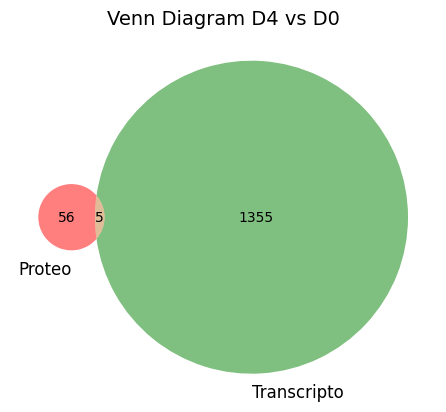

In [70]:
vd = venn2([de_2_0, up_tr_2],set_labels=("Proteo","Transcripto"))
vd.get_patch_by_id("10").set_alpha(0.5)
vd.get_patch_by_id("01").set_alpha(0.5)

plt.title("Venn Diagram D4 vs D0",fontsize=14)

Text(0.5, 1.0, 'Venn Diagram D4 vs D2')

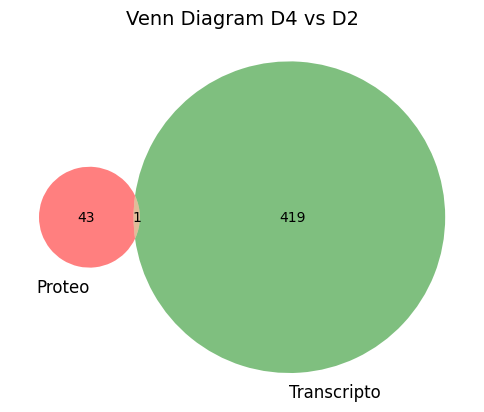

In [71]:
vd = venn2([de_2_1, up_tr_3],set_labels=("Proteo","Transcripto"))
vd.get_patch_by_id("10").set_alpha(0.5)
vd.get_patch_by_id("01").set_alpha(0.5)

plt.title("Venn Diagram D4 vs D2",fontsize=14)

In [75]:
de_1_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.15]["Gene Symbol"].dropna())
de_2_1 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T48h)"] < 0.15]["Gene Symbol"].dropna())
de_2_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T0)"] < 0.15]["Gene Symbol"].dropna())

print(len(de_1_0),len(de_2_1),len(de_2_0))

181 80 103


In [73]:
de_1_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05]["Gene Symbol"].dropna())
de_2_1 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T48h)"] < 0.05]["Gene Symbol"].dropna())
de_2_0 = set(prot_data[prot_data["Abundance Ratio Adj. P-Value: (T96h) / (T0)"] < 0.05]["Gene Symbol"].dropna())

print(len(de_1_0),len(de_2_1),len(de_2_0))

145 44 61


In [76]:
de_2_0

{'ACAT1',
 'ADAMTSL4',
 'APOA1',
 'APOA1BP; NAXE',
 'APOA2',
 'APOC1',
 'APP',
 'ATP6V1B2',
 'C11orf9; MYRF',
 'C1QBP',
 'C1QC',
 'C1R',
 'C5',
 'C6orf211; ARMT1',
 'CALR',
 'CD109',
 'CD9',
 'CFHR1',
 'CFHR5',
 'CFP',
 'COL12A1',
 'COL18A1',
 'COL1A1',
 'COL1A2',
 'COL3A1',
 'COL4A2',
 'COL5A1',
 'COL6A1',
 'COL6A3',
 'DIRAS2',
 'DLD',
 'DNHD1',
 'ECH1',
 'F13B',
 'FBN2',
 'FETUB',
 'FGB',
 'FGG',
 'FH',
 'FRMPD1',
 'FSTL1',
 'GALE',
 'GLUD1',
 'GPR84',
 'GPX3',
 'GRB2',
 'H3F3A; H3F3AP4; H3F3B',
 'HADHB',
 'HIST1H2AA',
 'HIST1H4A; HIST1H4F; HIST1H4D; HIST1H4J; HIST2H4A; HIST2H4B; HIST1H4H; HIST1H4C; HIST4H4; HIST1H4E; HIST1H4I; HIST1H4B; HIST1H4K; HIST1H4L',
 'HIST2H2BF',
 'HIST3H2A',
 'HMGN2',
 'HSPA5',
 'HTRA1',
 'IFNE',
 'IGHG2',
 'IGHV3-33',
 'IGKV2-40; IGKV2D-40',
 'IMMT',
 'JPH4',
 'LAMP2',
 'LMNA',
 'LMNB1',
 'LOC100289944; IGHV4-34',
 'LTBP1',
 'LUM',
 'MAPKAPK2',
 'MDH2',
 'MMP2',
 'MMP3',
 'MT1E',
 'MT1X',
 'MYCBP',
 'MYH11',
 'NT5C',
 'P4HA1',
 'PCOLCE',
 'PICALM',
 'PLG',

In [77]:
up_tr_3

{'ABCA6',
 'ABCA9',
 'ABCG2',
 'AC004812.2',
 'AC004877.1',
 'AC005740.4',
 'AC006111.2',
 'AC006460.1',
 'AC006460.2',
 'AC007485.2',
 'AC007566.1',
 'AC007611.1',
 'AC008507.1',
 'AC008556.1',
 'AC008764.9',
 'AC009065.1',
 'AC009961.3',
 'AC011379.2',
 'AC011503.1',
 'AC011815.1',
 'AC012313.2',
 'AC013403.2',
 'AC013477.1',
 'AC015712.7',
 'AC018690.1',
 'AC019131.2',
 'AC021148.2',
 'AC024075.1',
 'AC025449.1',
 'AC026202.2',
 'AC027271.1',
 'AC027575.2',
 'AC034198.2',
 'AC048341.1',
 'AC048382.2',
 'AC067750.1',
 'AC068338.2',
 'AC068790.8',
 'AC072061.1',
 'AC083805.3',
 'AC083862.1',
 'AC084125.4',
 'AC084824.1',
 'AC087501.4',
 'AC087623.3',
 'AC090192.2',
 'AC090229.1',
 'AC092279.1',
 'AC092375.2',
 'AC092376.2',
 'AC092687.3',
 'AC093010.2',
 'AC093627.5',
 'AC093908.1',
 'AC099332.2',
 'AC105749.1',
 'AC108673.2',
 'AC109449.1',
 'AC109460.3',
 'AC110285.6',
 'AC112206.2',
 'AC116913.1',
 'AC124045.1',
 'AC130371.2',
 'AC132938.3',
 'AC137630.3',
 'AC138028.2',
 'AC138028